In [ ]:
import yaml
import pandas as pd
from pathlib import Path
from importlib import reload
import sys
sys.path.append('..')
import stats
reload(stats)
import utils
reload(utils)
from matplotlib import pyplot as plt
import numpy as np

CONF_DIR = Path('../conf/').resolve()
DATA_DIR = Path('../data/').resolve()
ISSUES_DIR = Path('../data/issues/').resolve()
UBLOCK_CONFS_DIR = ISSUES_DIR / "ublock/2024-06-11/issues_confs.csv"
UBLOCK_DEDUP_CONFS_DIR = ISSUES_DIR / "ublock/2024-06-14:dedup/issues_confs.csv"
ADGUARD_CONFS_DIR = ISSUES_DIR / "adguard/2024-04-24/issues_confs.csv"

In [3]:
CONF_DATASETS = {
    'adguard':  pd.read_csv(ADGUARD_CONFS_DIR),
    'ublock': pd.read_csv(UBLOCK_CONFS_DIR),
    'ublock_dedup': pd.read_csv(UBLOCK_DEDUP_CONFS_DIR)
}

# Filter-list statistics

In [2]:
FILTERLISTS_DEFS = {
    "adguard": yaml.safe_load(open(CONF_DIR  / "filterlists/adguard.yaml")),
    "ublock": yaml.safe_load(open(CONF_DIR  / "filterlists/ublock.yaml"))
}

for adblocker in FILTERLISTS_DEFS:
    print(f"No. of filterlists for {adblocker}: {len(FILTERLISTS_DEFS[adblocker]['list'])}")
    print(f"No. of default filterlists for {adblocker}: {len(FILTERLISTS_DEFS[adblocker]['default'])}")

No. of filterlists for adguard: 87
No. of default filterlists for adguard: 2
No. of filterlists for ublock: 68
No. of default filterlists for ublock: 5


In [3]:
CONF_DATASETS = {
    'adguard':  pd.read_csv(ADGUARD_CONFS_DIR),
    'ublock': pd.read_csv(UBLOCK_CONFS_DIR),
    'ublock_dedup': pd.read_csv(UBLOCK_DEDUP_CONFS_DIR)
}

In [6]:
reload(stats)

valid_ublock_issues = CONF_DATASETS['ublock'][CONF_DATASETS['ublock'].valid]

user_changes, unchanged_users, user_change_stats = stats.get_users_changes_df_and_stats_df(valid_ublock_issues)

In [42]:
def get_stealth_mode(x):
    
    try:
        out = eval(x) if isinstance(x, str) else {}
        
        has_stealth_mode_options = (len(out.get('Stealth mode options', [])) + len(out.get('Tracking protection options', []))) > 0
        has_advanced_protection = out.get('Advanced protection', 'disabled') == 'enabled'
        stealth_mode_disabled = out.get('Stealth mode', 'enabled') == 'disabled'
        
        # if not has_stealth_mode_options and not stealth_mode_disabled and not has_advanced_protection:
        #     print(f"Stealth mode options not found in: {x}")
        
        return has_stealth_mode_options, stealth_mode_disabled, has_advanced_protection, has_stealth_mode_options or not stealth_mode_disabled or has_advanced_protection
        
    except:
        raise ValueError(f"Error parsing: {x}")

df = CONF_DATASETS['adguard'].copy()
df[['has_stealth_mode_options', 'stealth_mode_disabled', 'has_advanced_protection', 'any_stealth_mode']] = df['conf_dict'].apply(get_stealth_mode).apply(pd.Series)

print(f"No. of issues with any stealth mode options: {len(df[df.any_stealth_mode])} ({len(df[df.any_stealth_mode]) / len(df) * 100:.2f}%)")
print(f"No. of issues with stealth mode options: {len(df[df.has_stealth_mode_options])} ({len(df[df.has_stealth_mode_options]) / len(df) * 100:.2f}%)")
print(f"No. of issues with stealth mode disabled: {len(df[df.stealth_mode_disabled])} ({len(df[df.stealth_mode_disabled]) / len(df) * 100:.2f}%)")
print(f"No. of issues with advanced protection: {len(df[df.has_advanced_protection])} ({len(df[df.has_advanced_protection]) / len(df) * 100:.2f}%)")

def get_other_extensions(x):
    
    try:
        out = eval(x) if isinstance(x, str) else {}
        
        a = out.get('Other extensions used', None)
            
        return len(a.split(",")) if a else None
    
    except:
        raise ValueError(f"Error parsing: {x}")
    
    
df['other_extensions'] = df['conf_dict'].apply(get_other_extensions)
    
    
print(f"issues that have other extensions: {len(df[df.other_extensions.notnull()])} ({len(df[df.other_extensions.notnull()]) / len(df) * 100:.2f}%)")
print(df['other_extensions'].value_counts())

def get_topics(x):
    
    try:
        out = eval(x) if isinstance(x, str) else []
        
        for label in out:
            if label.startswith('T:'):
                return label
            
        return None
    
    except:
        raise ValueError(f"Error parsing: {x}")
    

df['topic'] = df['labels'].apply(get_topics)
print(df['topic'].value_counts())



No. of issues with any stealth mode options: 7404 (39.96%)
No. of issues with stealth mode options: 6991 (37.73%)
No. of issues with stealth mode disabled: 11125 (60.04%)
No. of issues with advanced protection: 23 (0.12%)
issues that have other extensions: 2518 (13.59%)
other_extensions
1.0     1954
2.0      313
3.0       89
4.0       73
5.0       34
7.0       12
6.0        9
9.0        8
14.0       6
10.0       6
8.0        5
15.0       2
23.0       2
11.0       2
16.0       1
13.0       1
12.0       1
Name: count, dtype: int64
topic
T: Ads                    5948
T: Annoyance              5542
T: Incorrect Blocking     3150
T: Anti Adblock Script    2468
T: Social Widget          1125
T: Analytics                48
T: Stealth Mode issue        2
T: Popups                    2
Name: count, dtype: int64


In [41]:
df

i   issue                   title           author  \
0          0  177748     lemino.docomo.ne.jp  bot-user-177748   
1          1  177745              odysee.com  bot-user-177745   
2          2  177732  www.solasto-career.com  bot-user-177732   
3          4  177727          www.eroita.net  bot-user-177727   
4          5  177725    www.familydollar.com  bot-user-177725   
...      ...     ...                     ...              ...   
18524  18806  134238           www.jrlt9.com  bot-user-134238   
18525  18807  134234              hdrezka.sh  bot-user-134234   
18526  18808  134233                 zoro.to  bot-user-134233   
18527  18809  134230           www.redd.tube  bot-user-134230   
18528  18810  134229               9anime.to  bot-user-134229   

                                                  labels  submitted_by_bot  \
0      ["T: Ads", "P3: Medium", "N: AdGuard Browser E...              True   
1      ["T: Incorrect Blocking", "P1: Critical", "N: ...              True   
2      ["T: Social Widget", "P4: Low", "N: AdGuard Br...              True   
3      ["T: Ads", "P3: Medium", "NSFW", "N: AdGuard B...              True   
4      ["T: Annoyance", "P3: Medium", "N: AdGuard Bro...              True   
...                                                  ...               ...   
18524  ["T: Incorrect Blocking", "A: Cannot reproduce...              True   
18525  ["T: Incorrect Blocking", "A: Cannot reproduce...              True   
18526  ["T: Annoyance", "P2: High", "A: In progress",...              True   
18527  ["T: Ads", "A: Resolved", "P2: High", "NSFW", ...              True   
18528  ["A: Cannot reproduce", "T: Annoyance", "P2: H...              True   

                 created_at  is_closed  valid  \
0      2024-04-24T06:15:17Z      False   True   
1      2024-04-24T05:07:25Z      False   True   
2      2024-04-23T22:37:21Z      False   True   
3      2024-04-23T21:35:51Z      False   True   
4      2024-04-23T20:37:09Z      False   True   
...                     ...        ...    ...   
18524  2022-11-06T06:42:34Z       True   True   
18525  2022-11-06T03:47:15Z       True   True   
18526  2022-11-06T03:28:57Z       True   True   
18527  2022-11-06T02:38:09Z       True   True   
18528  2022-11-06T02:00:08Z       True   True   

                                               conf_dict  ... system_version  \
0      {'AdGuard product': 'AdGuard Browser Extension...  ...     Windows 11   
1      {'AdGuard product': 'AdGuard Browser Extension...  ...   Linux x86_64   
2      {'AdGuard product': 'AdGuard Browser Extension...  ...      Windows11   
3      {'AdGuard product': 'AdGuard Browser Extension...  ...            NaN   
4      {'AdGuard product': 'AdGuard Browser Extension...  ...     Windows 10   
...                                                  ...  ...            ...   
18524  {'AdGuard product': 'AdGuard Browser extension...  ...            NaN   
18525  {'AdGuard product': 'AdGuard Browser extension...  ...            NaN   
18526  {'AdGuard product': 'AdGuard Browser extension...  ...            NaN   
18527  {'AdGuard product': 'AdGuard Browser extension...  ...            NaN   
18528  {'AdGuard product': 'AdGuard Browser extension...  ...            NaN   

            browser stealth_mode  \
0            Chrome          NaN   
1            Chrome          NaN   
2            Chrome     disabled   
3            Chrome     disabled   
4           Firefox          NaN   
...             ...          ...   
18524  EdgeChromium     disabled   
18525        Chrome          NaN   
18526        Chrome     disabled   
18527        Chrome     disabled   
18528       Firefox     disabled   

                                                 filters system_os  \
0      ["AdGuard Base", "AdGuard Mobile Ads", "AdGuar...   Windows   
1      ["AdGuard Base", "AdGuard Tracking Protection"...     Linux   
2      ["AdGuard Base", "AdGuard Mobile Ads", "AdGuar...   Windows   
3      ["AdGuard Base", "AdGua

In [13]:
# Default filterlists
ADGUARD_FILTERLISTS = pd.DataFrame(yaml.safe_load(open(CONF_DIR  / "filterlists/adguard.yaml"))['list'])
UBLOCK_FILTERLISTS = pd.DataFrame(yaml.safe_load(open(CONF_DIR  / "filterlists/ublock.yaml"))['list'])

ADGUARD_DEFAULT_LISTS = yaml.safe_load(open(CONF_DIR  / "filterlists/adguard.yaml"))['default']
UBLOCK_DEFAULT_LISTS = yaml.safe_load(open(CONF_DIR  / "filterlists/ublock.yaml"))['default']

ADGUARD_DEFAULT_LISTS = ADGUARD_FILTERLISTS[ADGUARD_FILTERLISTS.name.isin(ADGUARD_DEFAULT_LISTS)]
UBLOCK_DEFAULT_LISTS = UBLOCK_FILTERLISTS[UBLOCK_FILTERLISTS.name.isin(UBLOCK_DEFAULT_LISTS)]

print(f"Adguard default lists: {len(ADGUARD_DEFAULT_LISTS)}")
display(ADGUARD_DEFAULT_LISTS)

print(f"Ublock default lists: {len(UBLOCK_DEFAULT_LISTS)}")
display(UBLOCK_DEFAULT_LISTS)


Adguard default lists: 2


name  \
0                                        Base filter   
10  Filter unblocking search ads and self-promotions   

                                              aliases  \
0                                      [AdGuard Base]   
10  [Filter unblocking search ads and self-promotion]   

                                                  url version_control  
0   https://raw.githubusercontent.com/AdguardTeam/...             NaN  
10  https://raw.githubusercontent.com/AdguardTeam/...             NaN

Ublock default lists: 5


name                                     aliases  \
0   ublock-filters                      [uBlock filters – Ads]   
7         easylist                                  [EasyList]   
11     easyprivacy                               [EasyPrivacy]   
12       urlhaus-1            [Online Malicious URL Blocklist]   
31         plowe-0  [Peter Lowe’s Ad and tracking server list]   

                                                  url  \
0   https://ublockorigin.github.io/uAssetsCDN/filt...   
7   https://cdn.jsdelivr.net/gh/uBlockOrigin/uAsse...   
11  https://cdn.jsdelivr.net/gh/uBlockOrigin/uAsse...   
12  https://curbengh.github.io/malware-filter/urlh...   
31  https://pgl.yoyo.org/adservers/serverlist.php?...   

                                      version_control  
0   {'repo': 'uBlockOrigin/uAssetsCDN', 'files': [...  
7   {'repo': 'uBlockOrigin/uAssetsCDN', 'branch': ...  
11  {'repo': 'thedoggybrad/easylist-mirror', 'bran...  
12                                                NaN  
31                                                NaN

# User Forum Statistics

/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:135: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  created_ats = created_ats.dt.to_period("M")


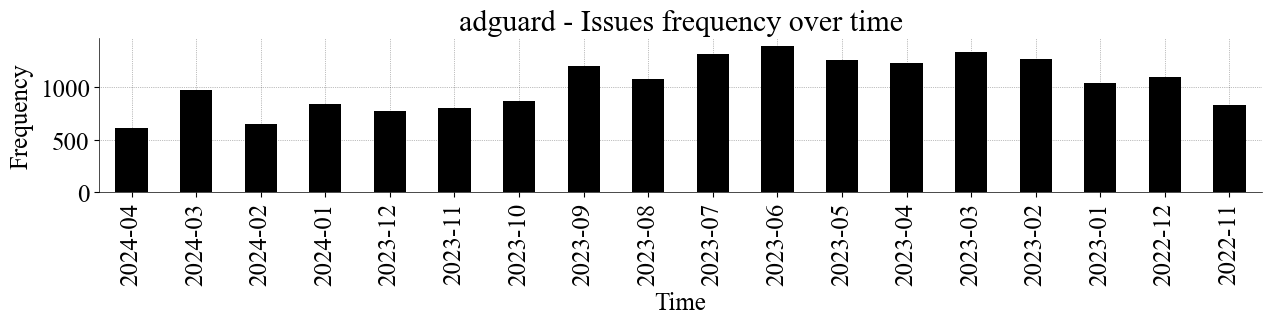

/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:135: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  created_ats = created_ats.dt.to_period("M")


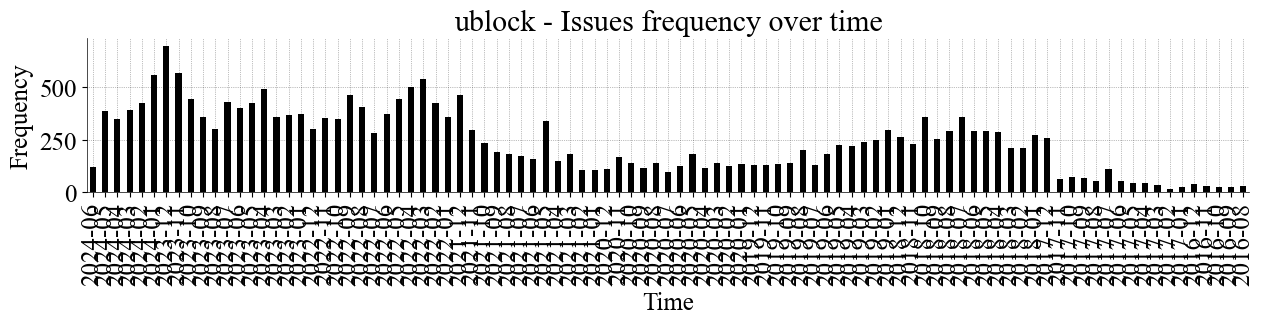

/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:135: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  created_ats = created_ats.dt.to_period("M")


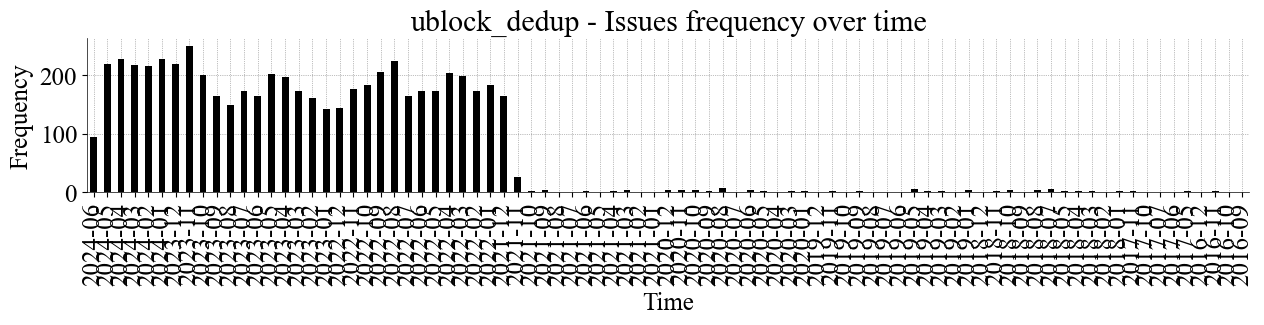

total           valid          closed earliest issue  \
adguard       18529  18494 (99.81%)  18461 (99.63%)     2022-11-06   
ublock        23006  11798 (51.28%)  22980 (99.89%)     2016-08-07   
ublock_dedup   5890  5890 (100.00%)   5870 (99.66%)     2016-09-17   

             latest issue  
adguard        2024-04-24  
ublock         2024-06-11  
ublock_dedup   2024-06-11

In [9]:
# Generic forum statistics
reload(stats)
stats.apply_to_datasets(stats.issues_dataset_statistics, CONF_DATASETS, is_notebook=True)
pass


## Metadata (OS, Browser, etc.)

browser
Chrome                                 60.827818
Firefox                                14.809591
Edge                                    8.055767
EdgeChromium                            6.569383
Opera                                   3.574916
                                         ...    
Kiwi Browser 116.0.5845.72              0.005425
Поиск                                   0.005425
Edge 117.0.2045.43 (Chromium-based)     0.005425
Edge 117.0.2045.47 (Chromium-based)     0.005425
вивальди                                0.005425
Name: count, Length: 146, dtype: float64
browser
chromium           40.441490
firefox            34.364613
chrome             17.062985
firefox mobile      5.718912
chromium mobile     2.130742
edge                0.144890
opera               0.059661
brave               0.025569
ie                  0.025569
vivaldi             0.017046
librewolf           0.008523
Name: count, dtype: float64
browser
chromium           52.212389
firefox            3

/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:66: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  hist = hist[:top_n]
/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:66: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  hist = hist[:top_n]


(              empty_system_os unique_system_os empty_browser unique_browser
 adguard        14681 (79.38%)       10 (0.05%)    60 (0.32%)    147 (0.79%)
 ublock        11798 (100.00%)        1 (0.01%)    65 (0.55%)     12 (0.10%)
 ublock_dedup   5890 (100.00%)        1 (0.02%)    14 (0.24%)     12 (0.20%),
 [None, None, None])

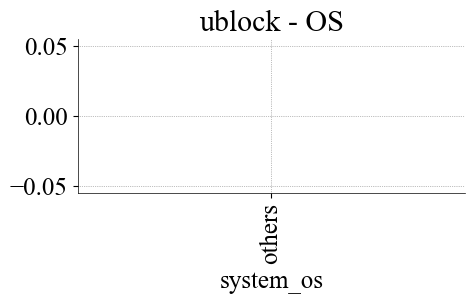

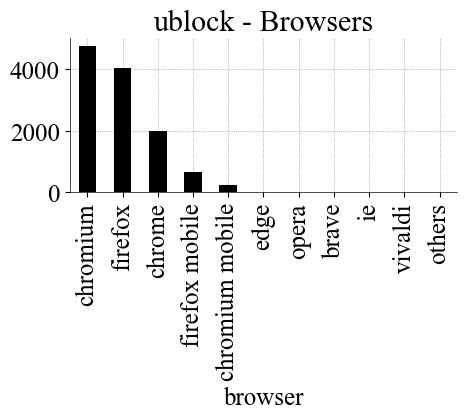

In [5]:
reload(stats)
stats.apply_to_datasets(stats.issues_metadata_statistics, CONF_DATASETS)

## Filterlist Combination Statistics

(              support  normalized_shannon_entropy unique_filterlists  \
 adguard         18494                    0.739301      5269 (28.49%)   
 ublock          11798                    0.594000      2436 (20.65%)   
 ublock_dedup     5890                    0.655542      1670 (28.35%)   
 
                        mode      mean        std  min   max  
 adguard        1209 (6.54%)  3.509964  31.980305    1  1209  
 ublock        3757 (31.84%)  4.843186  81.458483    1  3757  
 ublock_dedup  1118 (18.98%)  3.526946  37.490105    1  1118  ,
 [None, None, None])

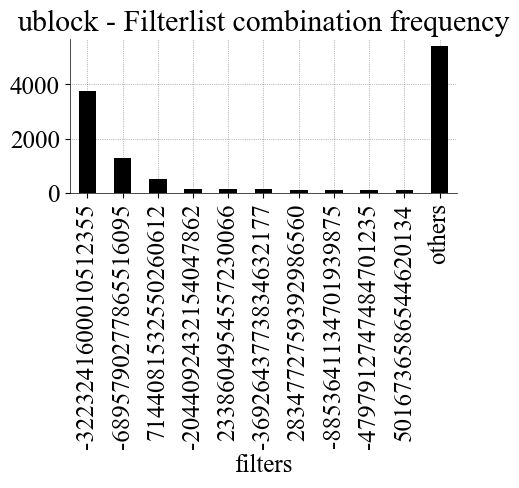

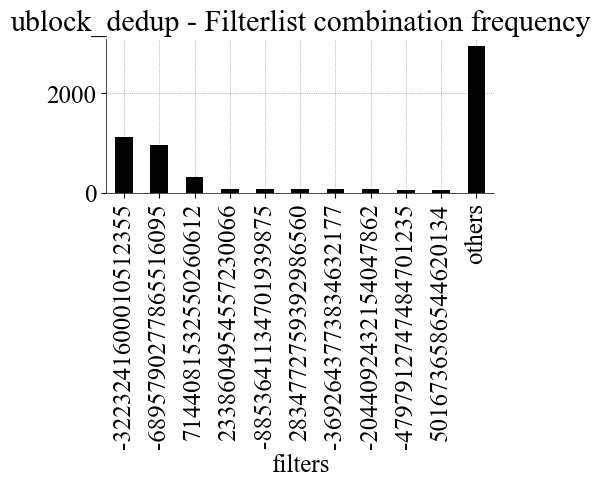

In [6]:
reload(stats)
stats.apply_to_datasets(stats.issues_filterlists_statistics, CONF_DATASETS)

unique_filterlists            mode  mode_frequency
adguard                       87    AdGuard Base  18338 (99.16%)
ublock                       863  ublock-filters  11767 (99.74%)
ublock_dedup                 724  ublock-filters   5864 (99.56%)

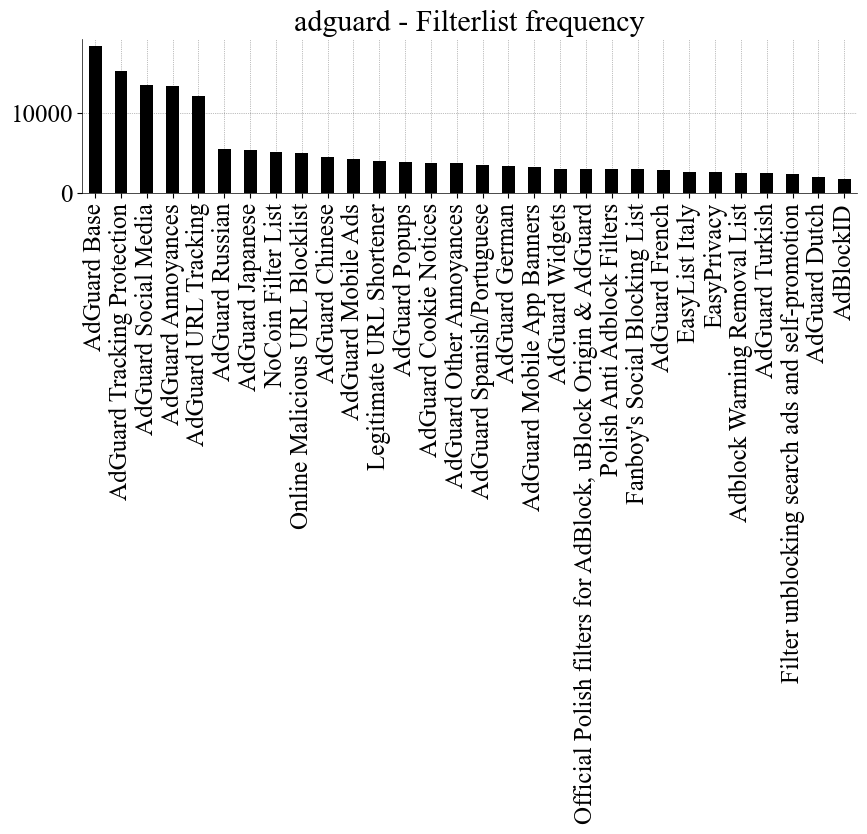

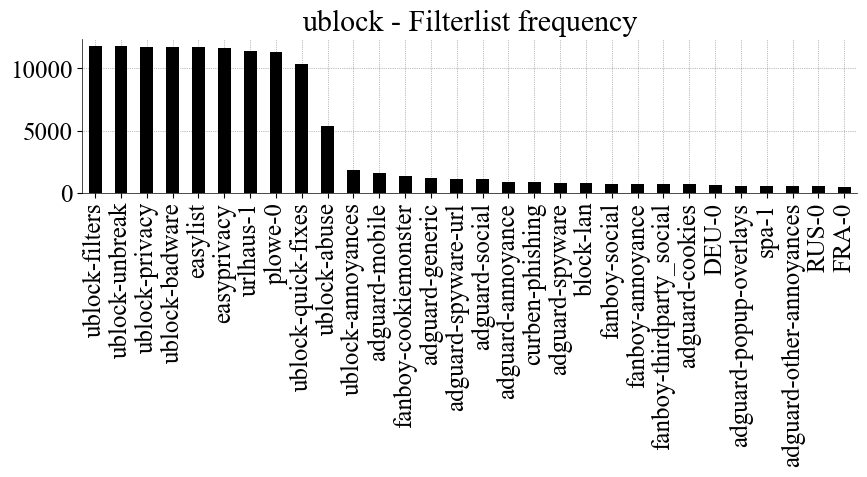

In [20]:
reload(stats)
summary, (adguard_fl_popularity, _, ublock_fl_popularity) = stats.apply_to_datasets(lambda _: stats.filterlist_individual_statistics(_, top_k=30, figsize=(10,2)), CONF_DATASETS)

display(summary)

# Attack Filter-list Coverage

In [5]:

ISSUES_DIR = {
    "adguard": Path('../data/filterlists/adguard/fingerprint').resolve(),
    "ublock": Path('../data/filterlists/ublock/fingerprint').resolve(),
}

reload(utils)
ATTACK_NAMES = utils.get_attack_names(CONF_DIR)

ATTACK_DATASETS = {dataset+" "+attack_name: pd.read_csv(issues_dir / f"{attack_name}/issues_confs_identified.csv") for dataset, issues_dir in ISSUES_DIR.items() for attack_name in ATTACK_NAMES if (issues_dir / f"{attack_name}/issues_confs_identified.csv").exists()}
ATTACK_FILTERLIST_STATS = {dataset+" "+attack_name: pd.read_csv(issues_dir / f"{attack_name}/unique_counts.csv") for dataset, issues_dir in ISSUES_DIR.items() for attack_name in ATTACK_NAMES if (issues_dir / f"{attack_name}/unique_counts.csv").exists()}
ATTACK_RULES_DATASETS = {dataset+" "+attack_name: pd.read_csv(issues_dir / f"{attack_name}/user_rules.csv") for dataset, issues_dir in ISSUES_DIR.items() for attack_name in ATTACK_NAMES if (issues_dir / f"{attack_name}/user_rules.csv").exists()}

KEEP FILTERLIST INTERMEDIARY


total            allowed  \
adguard css-container-query-attack  1047019    159988 (15.28%)   
adguard css-nth-child-attack        1047019    444878 (42.49%)   
adguard default                     1047019  1047019 (100.00%)   
adguard iframe-observer-attack      1047019   1044270 (99.74%)   
adguard image-alt-attack            1047019    417252 (39.85%)   
adguard lazy-image-loading-attack   1047019    577494 (55.16%)   
adguard stat-generic                1047019    604868 (57.77%)   
adguard stat-generic-network        1047019    444878 (42.49%)   
adguard stat-generic-cosmetic       1047019    159990 (15.28%)   
ublock css-container-query-attack    585536     61450 (10.49%)   
ublock css-nth-child-attack          585536          0 (0.00%)   
ublock default                       585536   585536 (100.00%)   
ublock iframe-observer-attack        585536    583267 (99.61%)   
ublock image-alt-attack              585536    274877 (46.94%)   
ublock lazy-image-loading-attack     585536    336332 (57.44%)   

                                             unique unique_filterlists  
adguard css-container-query-attack    55940 (5.34%)        58 (66.67%)  
adguard css-nth-child-attack        313843 (29.97%)        70 (80.46%)  
adguard default                     677883 (64.74%)        77 (88.51%)  
adguard iframe-observer-attack      677870 (64.74%)        76 (87.36%)  
adguard image-alt-attack            293625 (28.04%)        68 (78.16%)  
adguard lazy-image-loading-attack   349573 (33.39%)        69 (79.31%)  
adguard stat-generic                369783 (35.32%)        71 (81.61%)  
adguard stat-generic-network        313843 (29.97%)        70 (80.46%)  
adguard stat-generic-cosmetic         55940 (5.34%)        58 (66.67%)  
ublock css-container-query-attack    61264 (10.46%)        54 (79.41%)  
ublock css-nth-child-attack               0 (0.00%)          0 (0.00%)  
ublock default                      574538 (98.12%)        66 (97.06%)  
ublock iframe-observer-attack       574532 (98.12%)        65 (95.59%)  
ublock image-alt-attack             269939 (46.10%)        63 (92.65%)  
ublock lazy-image-loading-attack    331208 (56.56%)        63 (92.65%)

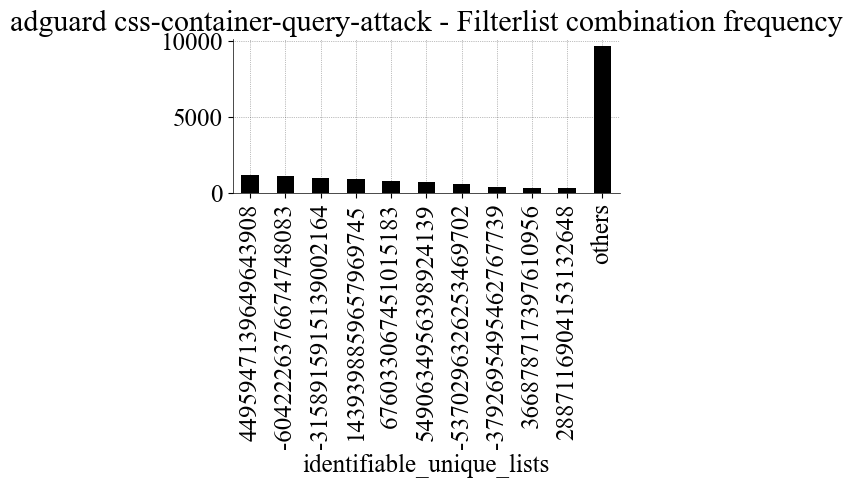

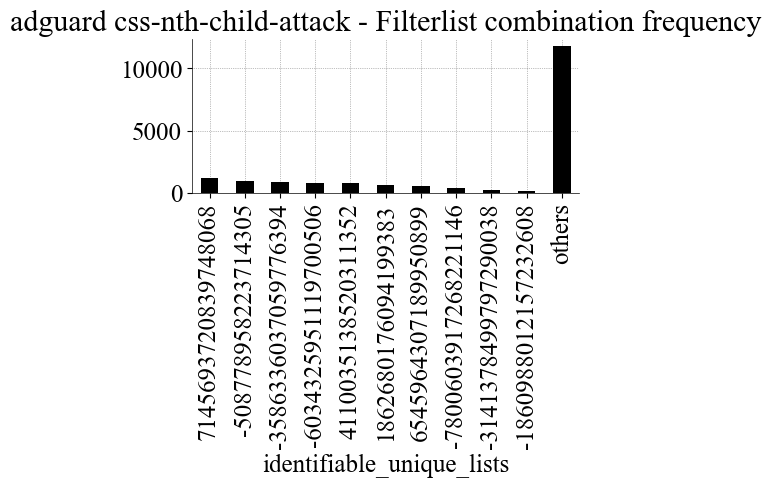

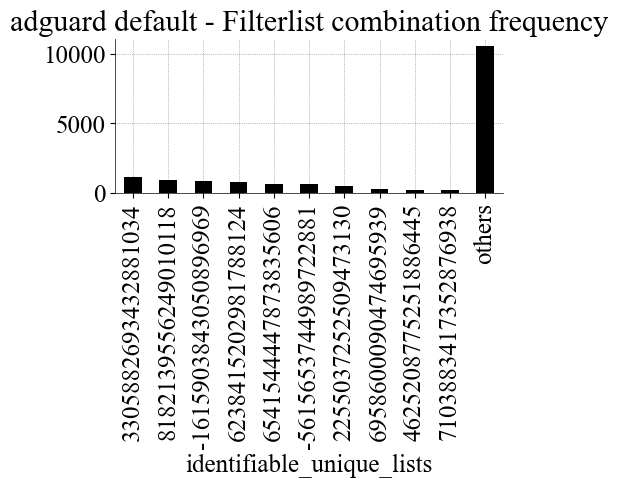

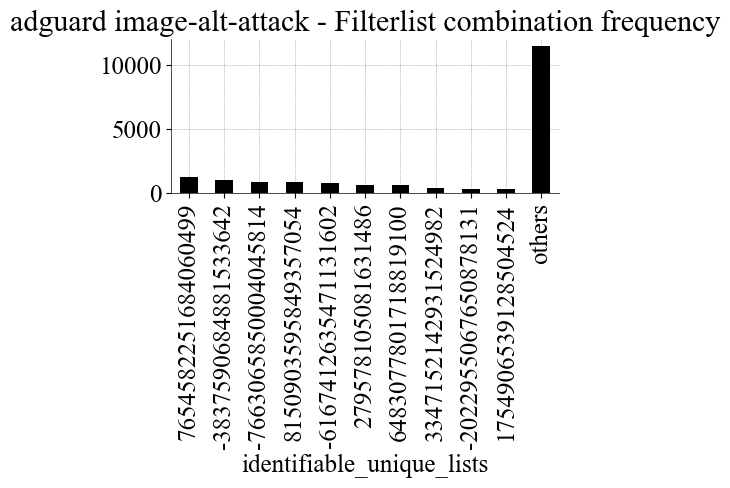

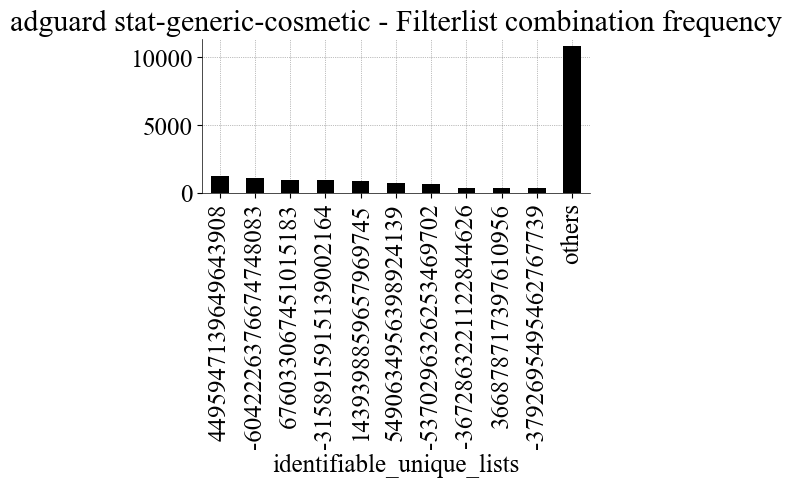

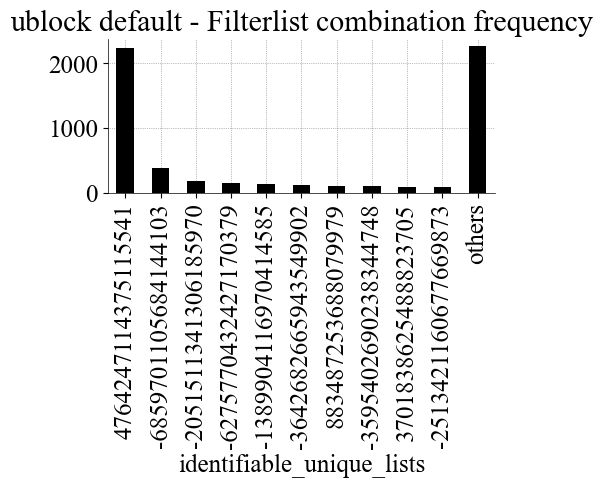

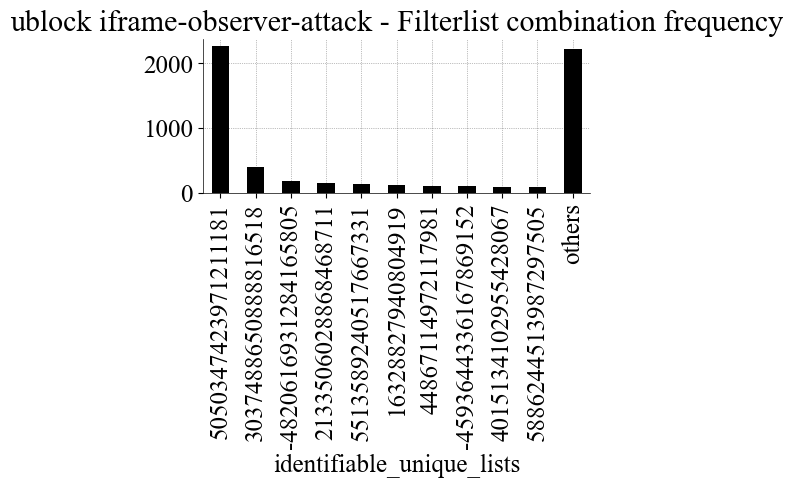

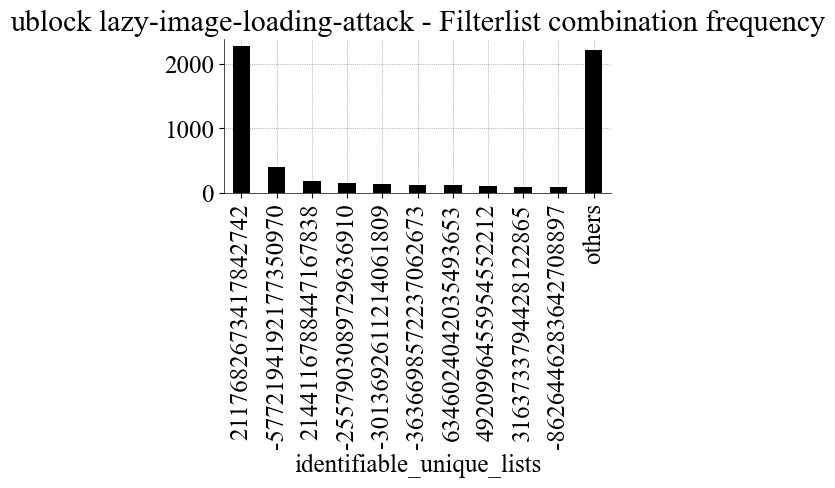

support  normalized_shannon_entropy  \
adguard css-container-query-attack    16873                    0.690463   
adguard css-nth-child-attack          18494                    0.723939   
adguard default                       16873                    0.725027   
adguard iframe-observer-attack        18494                    0.728454   
adguard image-alt-attack              18494                    0.717337   
adguard lazy-image-loading-attack     18494                    0.717327   
adguard stat-generic                  18494                    0.722819   
adguard stat-generic-network          18494                    0.722842   
adguard stat-generic-cosmetic         18494                    0.692723   
ublock css-container-query-attack      5890                    0.507795   
ublock default                         5890                    0.564914   
ublock iframe-observer-attack          5890                    0.560710   
ublock image-alt-attack                5890                    0.558755   
ublock lazy-image-loading-attack       5890                    0.558755   

                                   unique_filterlists           mode  \
adguard css-container-query-attack      3742 (22.18%)   1195 (7.08%)   
adguard css-nth-child-attack            4736 (25.61%)   1210 (6.54%)   
adguard default                         4570 (27.08%)   1177 (6.98%)   
adguard iframe-observer-attack          4931 (26.66%)   1210 (6.54%)   
adguard image-alt-attack                4602 (24.88%)   1222 (6.61%)   
adguard lazy-image-loading-attack       4605 (24.90%)   1222 (6.61%)   
adguard stat-generic                    4688 (25.35%)   1210 (6.54%)   
adguard stat-generic-network            4685 (25.33%)   1210 (6.54%)   
adguard stat-generic-cosmetic           4114 (22.25%)   1235 (6.68%)   
ublock css-container-query-attack        881 (14.96%)  2712 (46.04%)   
ublock default                          1200 (20.37%)  2236 (37.96%)   
ublock iframe-observer-attack           1191 (20.22%)  2262 (38.40%)   
ublock image-alt-attack                 1151 (19.54%)  2268 (38.51%)   
ublock lazy-image-loading-attack        1151 (19.54%)  2268 (38.51%)   

                                        mean        std  min   max  
adguard css-container-query-attack  4.509086  41.403140    1  1195  
adguard css-nth-child-attack        3.904983  34.901657    1  1210  
adguard default                     3.692123  33.873958    1  1177  
adguard iframe-observer-attack      3.750558  33.938882    1  1210  
adguard image-alt-attack            4.018688  36.171336    1  1222  
adguard lazy-image-loading-attack   4.016069  36.159608    1  1222  
adguard stat-generic                3.944966  35.212815    1  1210  
adguard stat-generic-network        3.947492  35.223976    1  1210  
adguard stat-generic-cosmetic       4.495382  41.616277    1  1235  
ublock css-container-query-attack   6.685585  92.523322    1  2712  
ublock default                      4.908333  66.346376    1  2236  
ublock iframe-observer-attack       4.945424  67.357808    1  2262  
ublock image-alt-attack             5.117289  68.714112    1  2268  
ublock lazy-image-loading-attack    5.117289  68.714112    1  2268

''

In [14]:
reload(stats)

print("KEEP FILTERLIST INTERMEDIARY")
stats.apply_to_datasets(stats.attack_filterlists_statistics, ATTACK_FILTERLIST_STATS, is_notebook=True)
stats.apply_to_datasets(lambda df: stats.issues_filterlists_statistics(df, variable_column="identifiable_unique_lists"), ATTACK_DATASETS, is_notebook=True)

# print("USE RULES DIRECTLY")
# stats.apply_to_datasets(stats.issues_direct_rules_statistics, ATTACK_RULES_DATASETS, is_notebook=True)

# print("USE EQUIVALENT CLASSES")
# stats.apply_to_datasets(stats.attack_filterlists_statistics, ATTACK_FILTERLIST_STATS, is_notebook=True)
# stats.apply_to_datasets(stats.attack_filterlists_equiv_set_statistics, ATTACK_FILTERLIST_STATS, is_notebook=True)
# stats.apply_to_datasets(lambda df: stats.issues_filterlists_statistics(df, variable_column="identifiable_unique_lists"), ATTACK_DATASETS, is_notebook=True)

""

### Coverage

In [16]:
# How much more combinations we get if we use the set-equivalence represntation

reload(stats)

ATTACK_DATASETS = {
    ADBLOCKER + " " + attack: (
        f"../data/filterlists/{ADBLOCKER}/fingerprint/{attack}/unique_counts.csv",
        
        # mapping
        f"../data/filterlists/{ADBLOCKER}/fingerprint/{attack}/unique_filterlist_sets.json", 
        
        # targeted fingerprints
        f"../data/fingerprinting/{ADBLOCKER}/{attack}/filterlist/targeted/fingerprints.csv",
        
        # general fingerprint
        f"../data/fingerprinting/{ADBLOCKER}/{attack}/filterlist/general/max_size:90/fingerprint.json"
        
        )
    
    for ADBLOCKER in ["adguard", "ublock"]
    
    for attack in ATTACK_NAMES
    if attack not in [
        "css-nth-child-attack", 
        # "css-container-query-attack"
                      ]
    
}

stats.apply_to_datasets(lambda tup: stats.equivalent_list_set_stats(*tup), ATTACK_DATASETS, is_notebook=True)
""

No fingerprints found
No fingerprints found
No fingerprints found
No fingerprints found
No fingerprints found
No fingerprints found


n_allowed_rules  n_unique_lists  \
adguard css-container-query-attack    159988 (15.28%)              58   
adguard default                     1047019 (100.00%)              77   
adguard iframe-observer-attack       1044270 (99.74%)              76   
adguard image-alt-attack              417252 (39.85%)              68   
adguard lazy-image-loading-attack     577494 (55.16%)              69   
adguard stat-generic                  604868 (57.77%)              71   
adguard stat-generic-network          444878 (42.49%)              70   
adguard stat-generic-cosmetic         159990 (15.28%)              58   
ublock css-container-query-attack      61450 (10.49%)              54   
ublock default                       585536 (100.00%)              66   
ublock iframe-observer-attack         583267 (99.61%)              65   
ublock image-alt-attack               274877 (46.94%)              63   
ublock lazy-image-loading-attack      336332 (57.44%)              63   
ublock stat-generic                   354840 (60.60%)              63   
ublock stat-generic-network           293390 (50.11%)              63   
ublock stat-generic-cosmetic           61450 (10.49%)              54   

                                    average_n_unique_rules_ratio_per_list  \
adguard css-container-query-attack                               0.040655   
adguard default                                                  0.765841   
adguard iframe-observer-attack                                   0.754322   
adguard image-alt-attack                                         0.229467   
adguard lazy-image-loading-attack                                0.270127   
adguard stat-generic                                             0.296626   
adguard stat-generic-network                                     0.255971   
adguard stat-generic-cosmetic                                    0.040655   
ublock css-container-query-attack                                0.062077   
ublock default                                                   0.935993   
ublock iframe-observer-attack                                    0.921287   
ublock image-alt-attack                                          0.269860   
ublock lazy-image-loading-attack                                 0.331942   
ublock stat-generic                                              0.359894   
ublock stat-generic-network                                      0.297817   
ublock stat-generic-cosmetic                                     0.062077   

                                    n_unique_lists_ratio  n_list_sets  \
adguard css-container-query-attack              0.666667          143   
adguard default                                 0.885057          497   
adguard iframe-observer-attack                  0.873563          494   
adguard image-alt-attack                        0.781609          377   
adguard lazy-image-loading-attack               0.793103          406   
adguard stat-generic                            0.816092          418   
adguard stat-generic-network                    0.804598          393   
adguard stat-generic-cosmetic                   0.666667          143   
ublock css-container-query-attack               0.794118           98   
ublock default                                  0.970588          282   
ublock iframe-observer-attack                   0.955882          280   
ublock image-alt-attack                         0.926471          193   
ublock lazy-image-loading-attack                0.926471          212   
ublock stat-generic                             0.926471          216   
ublock stat-generic-network                     0.926471          197   
ublock stat-generic-cosmetic                    0.794118           98   

                                    n_list_sets_size_1  \
adguard css-container-query-attack                  58   
adguard default                                     77   
adguard iframe-observer-attack                      76   
adguard imag

''

# Attack Fingerprinting Metrics

## General Fingerprinting

css-container-query-attack
Max Uniqueness: 2855 (16.92%) for k=74
Max Entropy: 0.5836249743240836 for k=74
Median Anon Set Size: 81.0 for k=55
Median Anon Set Size (rel): 0.004800568956320749 for k=55


/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:356: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if relative:


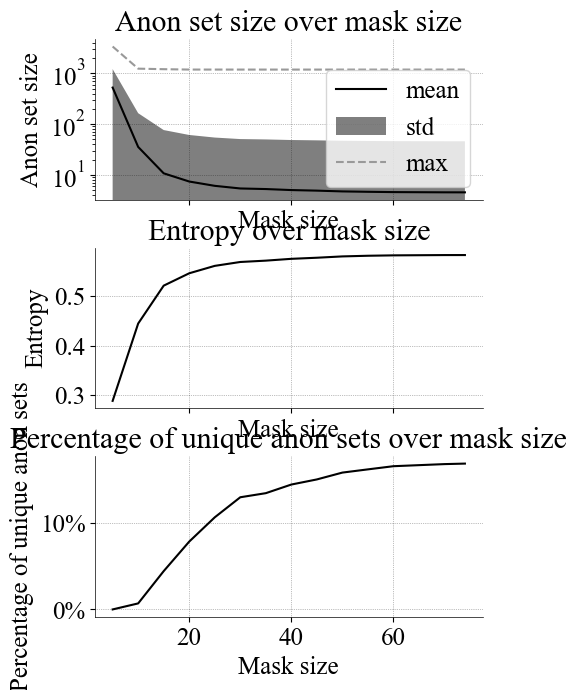

css-nth-child-attack
default


/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:356: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if relative:


Max Uniqueness: 3592 (21.29%) for k=86
Max Entropy: 0.6277302164853675 for k=86
Median Anon Set Size: 38.0 for k=45
Median Anon Set Size (rel): 0.0022521187696319563 for k=45


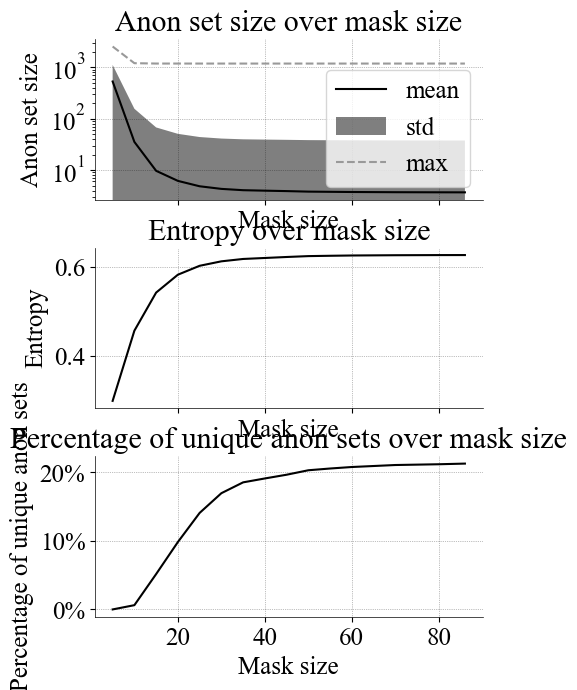

iframe-observer-attack
Max Uniqueness: 3865 (20.90%) for k=87
Max Entropy: 0.630445790858088 for k=87
Median Anon Set Size: 41.0 for k=55
Median Anon Set Size (rel): 0.002216935222234238 for k=55


/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:356: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if relative:


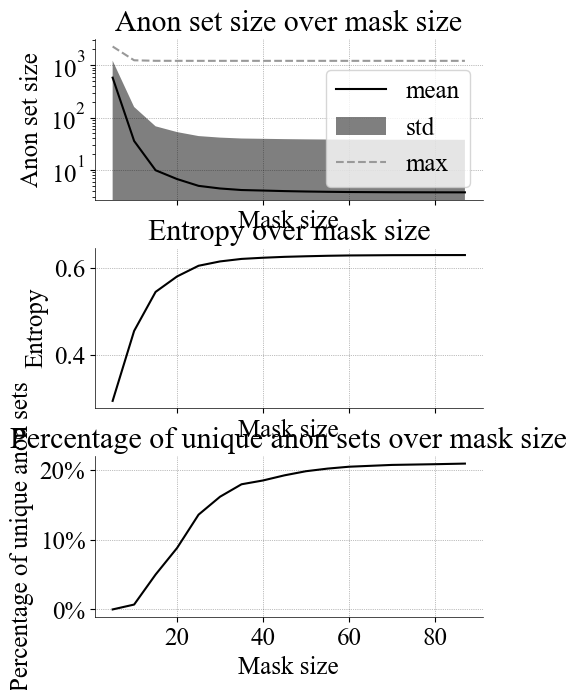

image-alt-attack
Max Uniqueness: 3566 (19.28%) for k=81
Max Entropy: 0.6157831483355303 for k=81
Median Anon Set Size: 48.0 for k=55
Median Anon Set Size (rel): 0.0025954363577376446 for k=55


/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:356: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if relative:


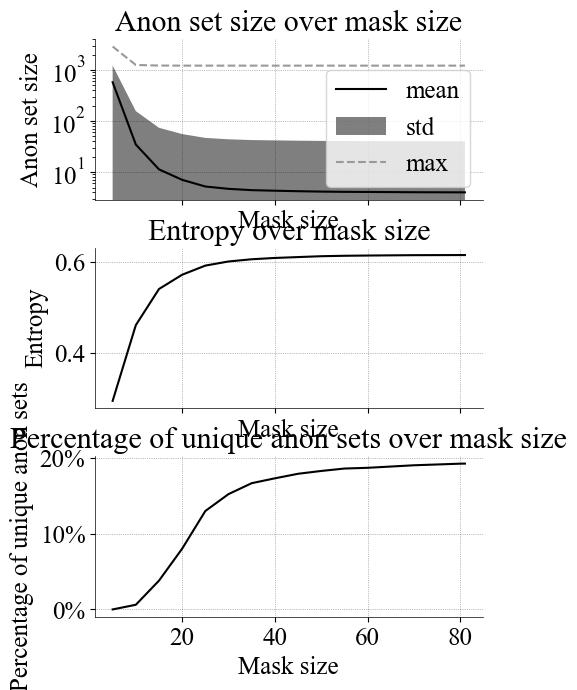

lazy-image-loading-attack


/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:356: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  if relative:


Max Uniqueness: 3570 (19.30%) for k=87
Max Entropy: 0.6158220992612959 for k=87
Median Anon Set Size: 48.0 for k=45
Median Anon Set Size (rel): 0.0025954363577376446 for k=45


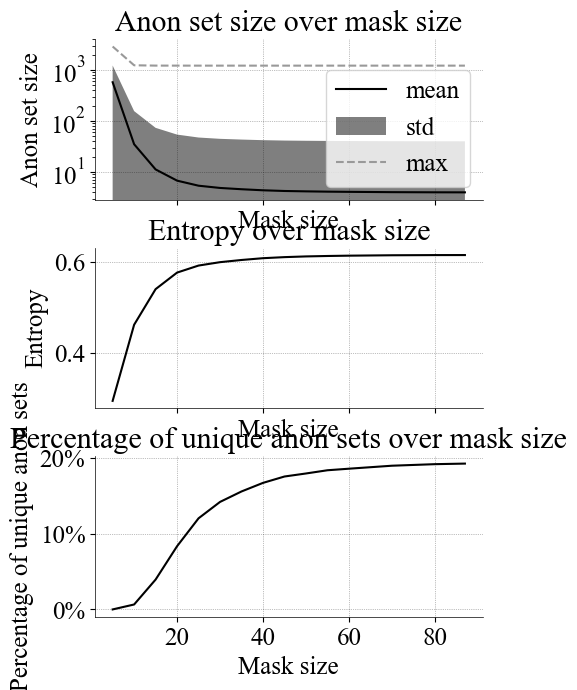

stat-generic
stat-generic-network
stat-generic-cosmetic


In [16]:
# ADGUARD
reload(stats)

for attack in ATTACK_NAMES:
    try:
        print(attack)
        stats.general_fingerprinting_stats(Path(f"../data/fingerprinting/adguard/{attack}/filterlist/general"), unique_upper_bound=1, is_notebook=True)
    
        plt.show()
    except:
        continue

/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:246: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_yticklabels([f"{x:.0f}%" for x in ax[2].get_yticks()])


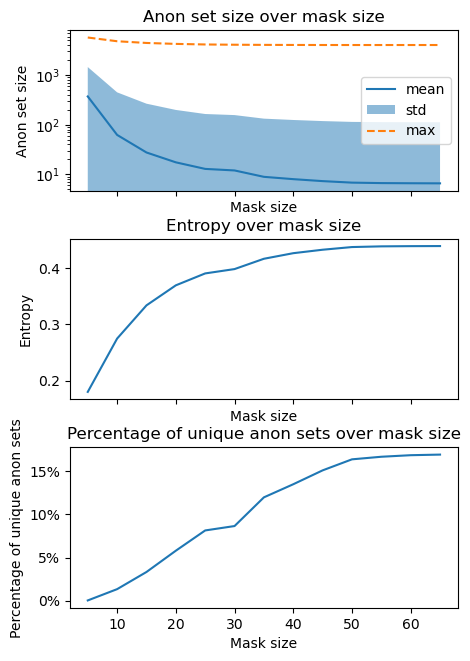

In [6]:
# UBLOCK
reload(stats)
stats.plot_anon_set_size_over_s(Path("../data/fingerprinting/ublock/default/filterlist/general"))
plt.show()

### Anon Set Size vs Rule Counts

Number of people with distance < 13 and anon set > 128: 7044 (38.09%)
Number of people with distance > 11 and anon set < 128: 4381 (23.69%)
Number of people with distance < 13 and anon set < 128: 6464 (34.95%)


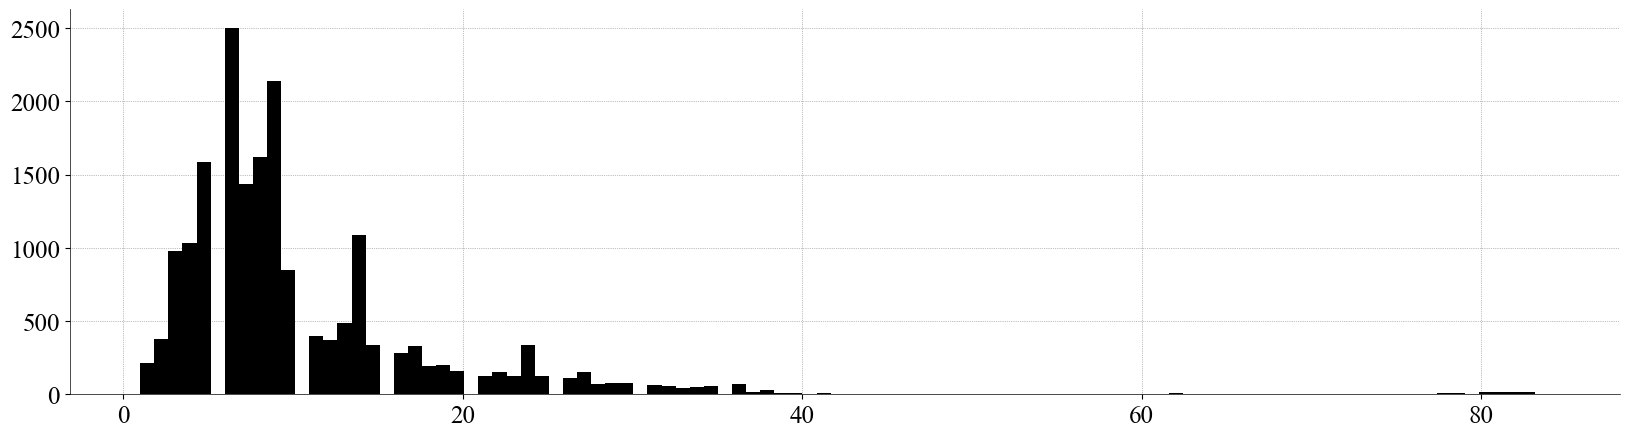

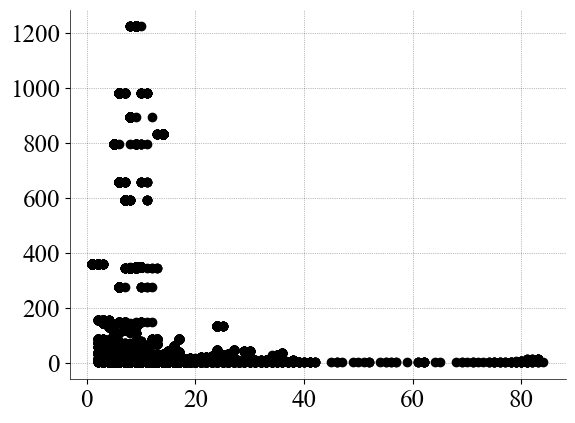

/mnt/spring_scratch_pure/home/selhajj/filterlist-fingerprint/scripts/stats.py:590: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f"{10**tick:.2f}" for tick in cbar.get_ticks()])


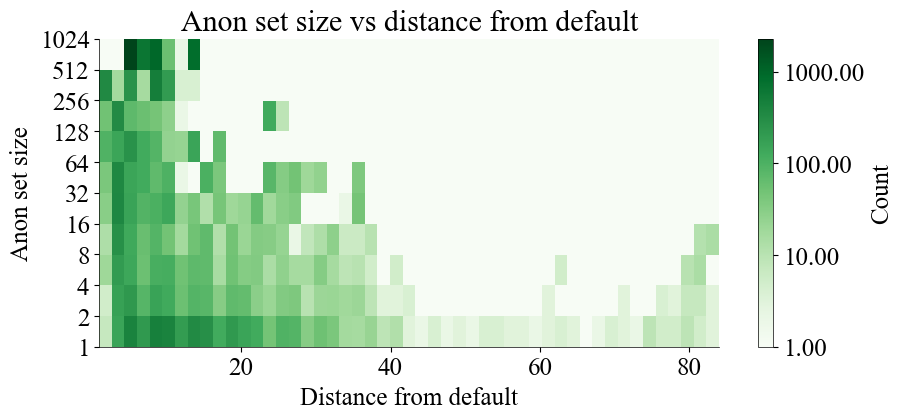

In [9]:
reload(stats)
fig, ax = stats.anon_set_size_vs_rules_count(
    Path(f"../data/fingerprinting/adguard/lazy-image-loading-attack/filterlist/targeted"), 
    Path(f"../data/filterlists/adguard/fingerprint/lazy-image-loading-attack/"), 
    yaml.safe_load(open(CONF_DIR  / "filterlists/adguard.yaml")),
    is_notebook=True
)

fig.savefig("figures/heatmap.pdf", bbox_inches='tight')

## Targeted Fingerprinting

image-alt-attack
Total fingerprints: 18494
Unique fingerprints: 3566 (19.28%)
Almost unique fingerprints (k=10): 6405 (34.63%)
Entropy of anon set sizes: 0.72
count    18494.000000
mean         9.681626
std          5.949368
min          2.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         29.000000
Name: max_size, dtype: float64
No stats directory found


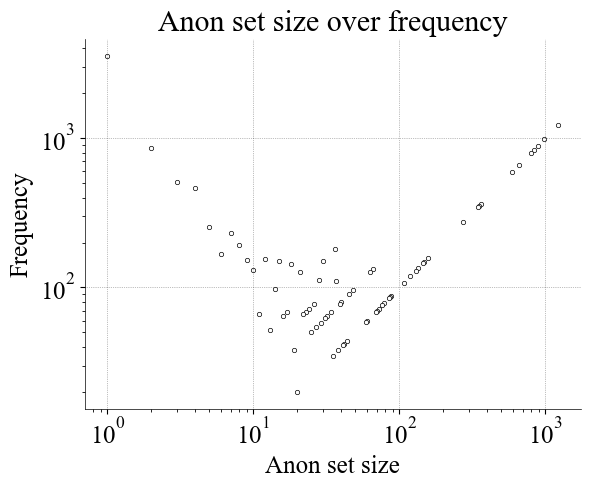

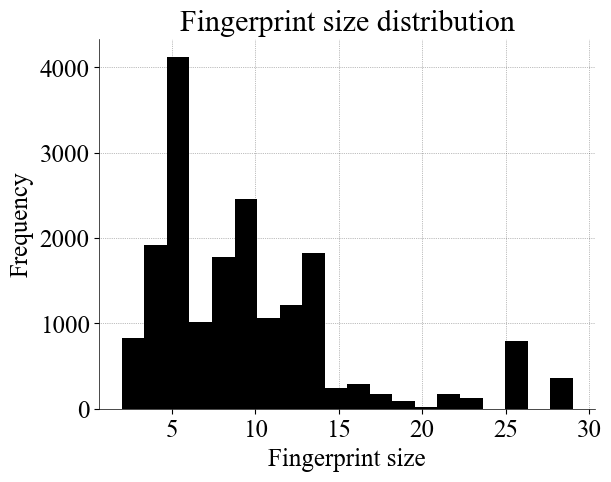

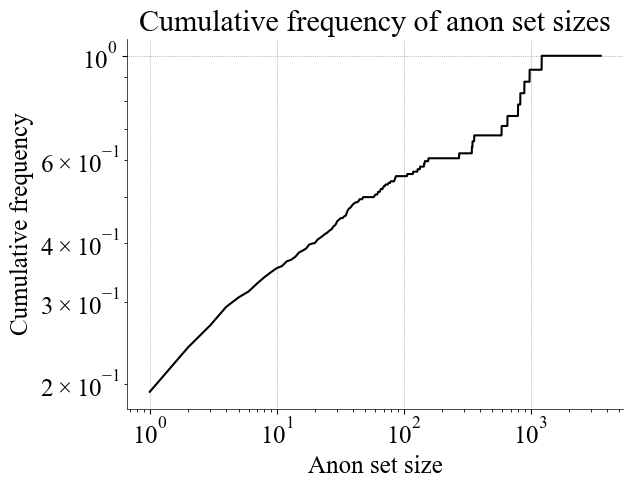

default
Total fingerprints: 16873
Unique fingerprints: 3592 (21.29%)
Almost unique fingerprints (k=10): 6290 (37.28%)
Entropy of anon set sizes: 0.73
count    16873.000000
mean         8.922835
std          5.752159
min          2.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         26.000000
Name: max_size, dtype: float64
No stats directory found


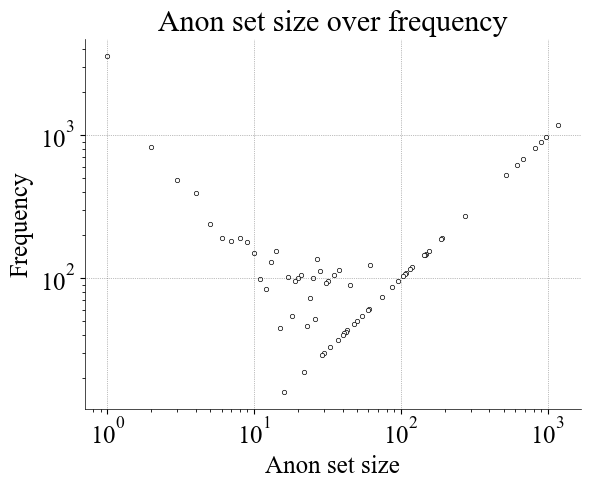

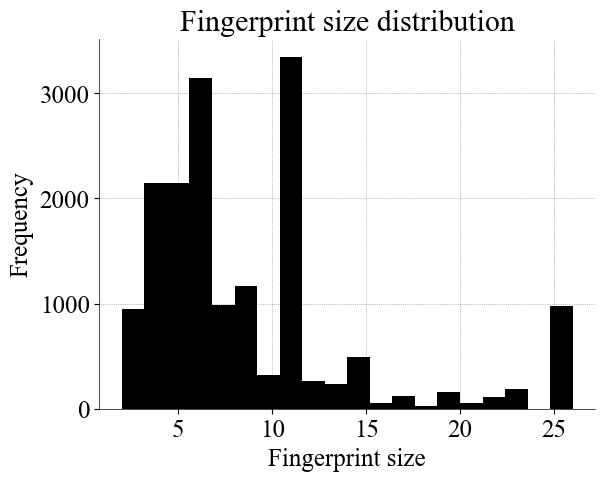

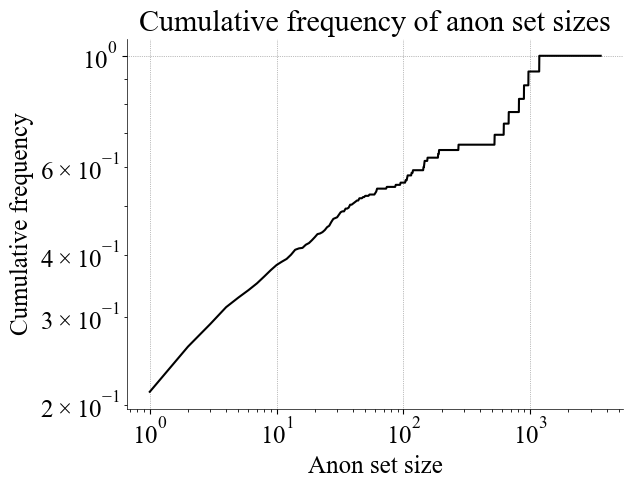

iframe-observer-attack
Total fingerprints: 18494
Unique fingerprints: 3865 (20.90%)
Almost unique fingerprints (k=10): 6789 (36.71%)
Entropy of anon set sizes: 0.73
count    18494.000000
mean         9.042717
std          5.799206
min          2.000000
25%          5.000000
50%          7.000000
75%         12.000000
max         27.000000
Name: max_size, dtype: float64
No stats directory found


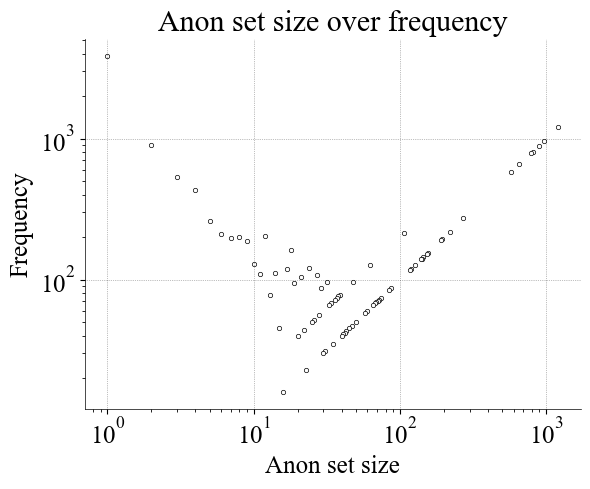

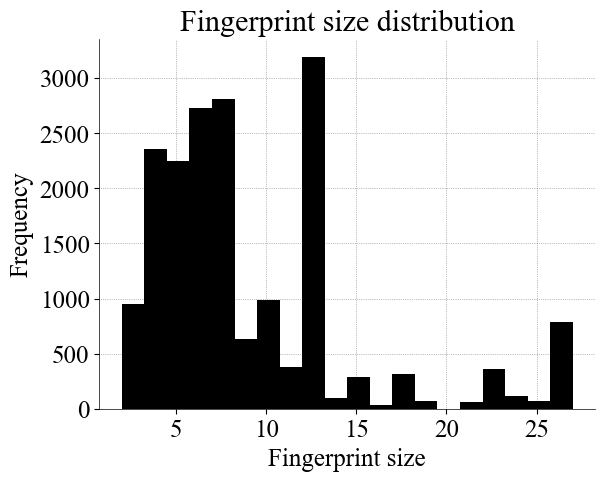

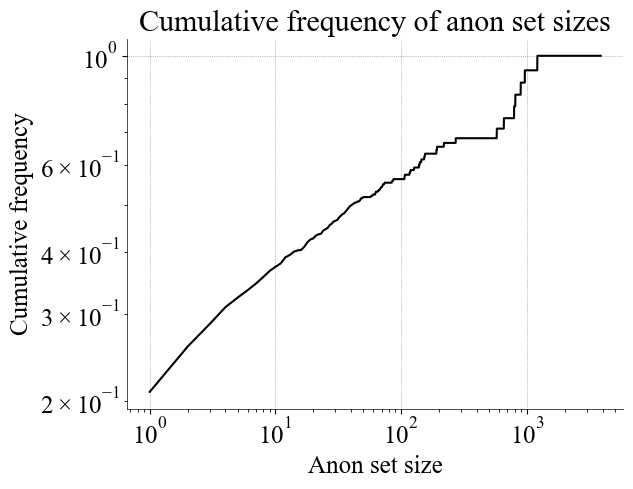

lazy-image-loading-attack
Total fingerprints: 18494
Unique fingerprints: 3570 (19.30%)
Almost unique fingerprints (k=10): 6406 (34.64%)
Entropy of anon set sizes: 0.72
count    18494.000000
mean         9.544014
std          5.871889
min          2.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         30.000000
Name: max_size, dtype: float64
No stats directory found


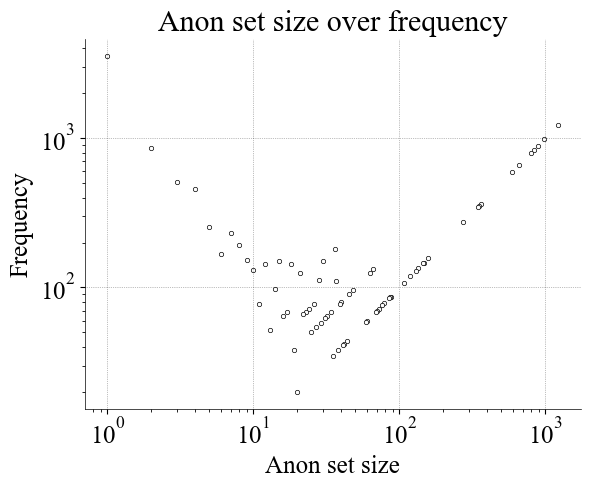

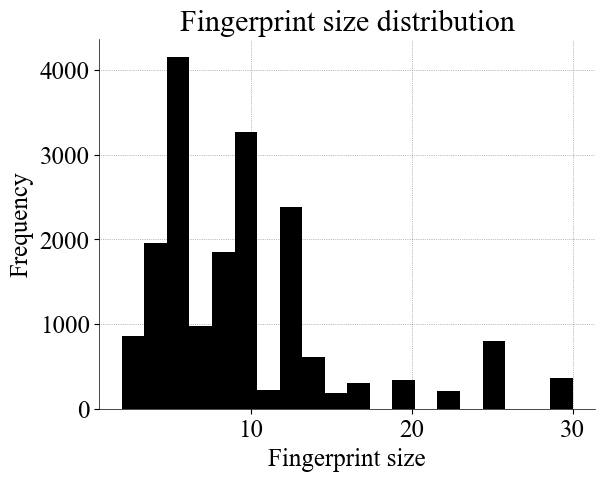

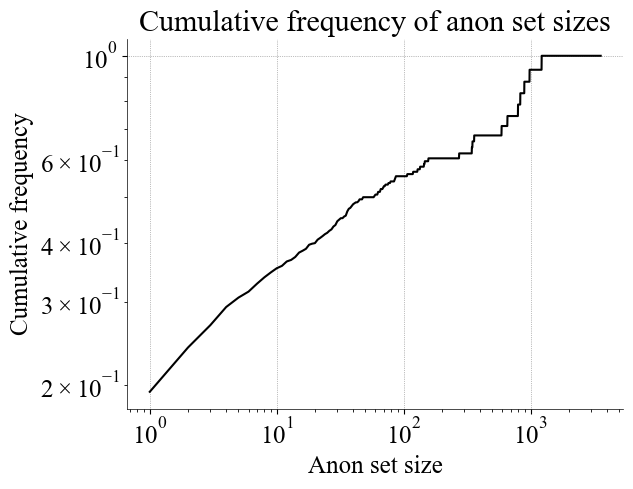

css-container-query-attack
Total fingerprints: 16873
Unique fingerprints: 2855 (16.92%)
Almost unique fingerprints (k=10): 5241 (31.06%)
Entropy of anon set sizes: 0.69
count    16873.000000
mean        10.701476
std          6.473774
min          2.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         29.000000
Name: max_size, dtype: float64
No stats directory found


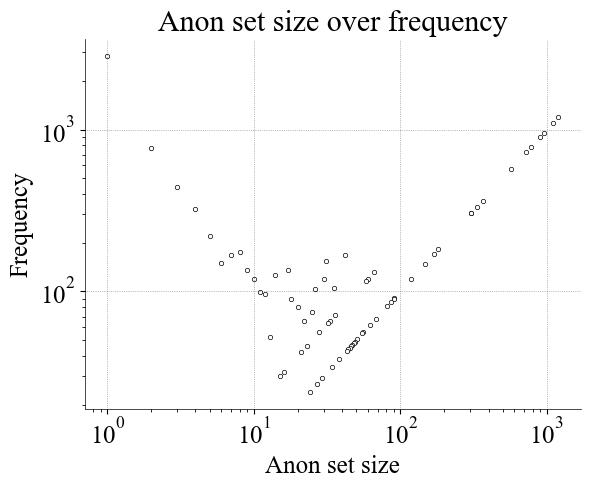

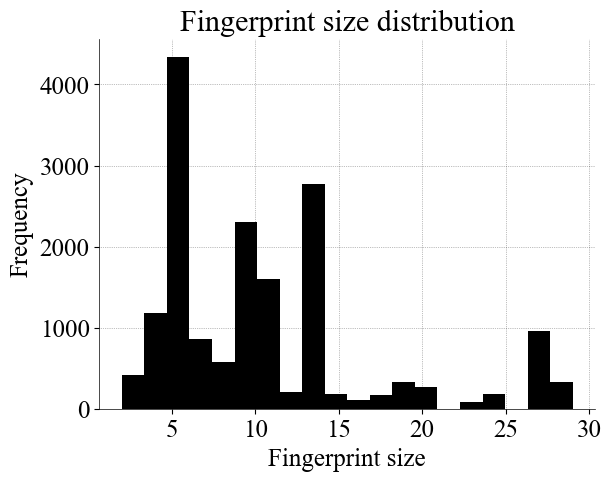

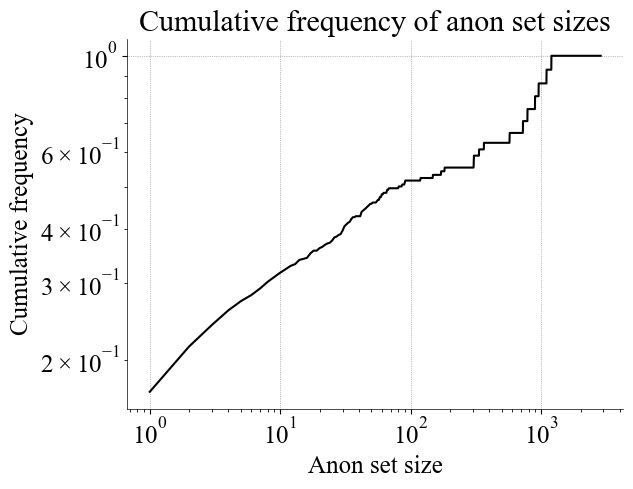

css-nth-child-attack
Total fingerprints: 16873
Unique fingerprints: 0 (0.00%)
Almost unique fingerprints (k=10): 0 (0.00%)
Entropy of anon set sizes: 0.73
count    16873.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: max_size, dtype: float64
No stats directory found


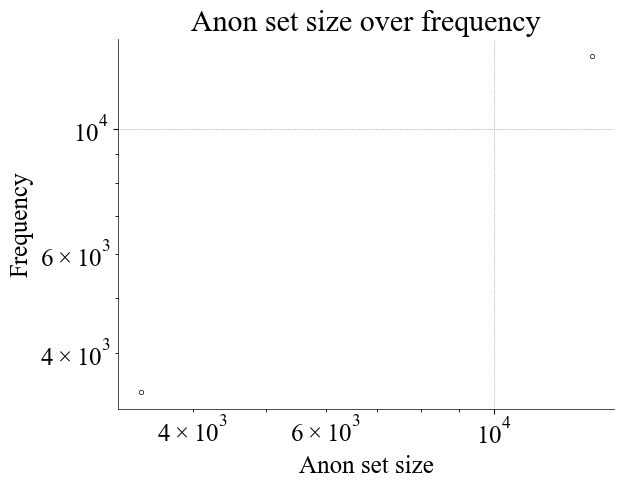

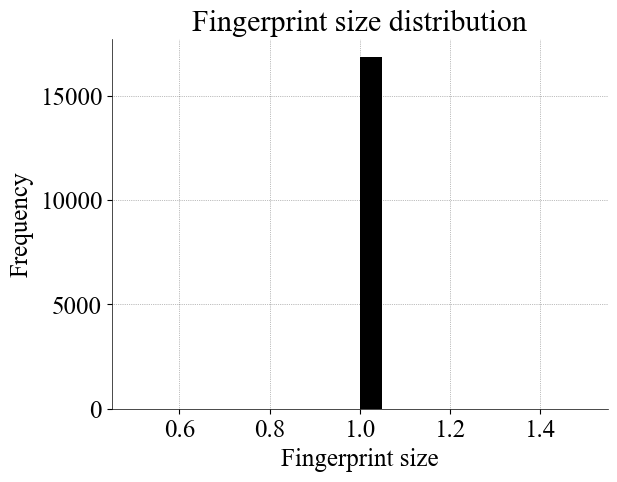

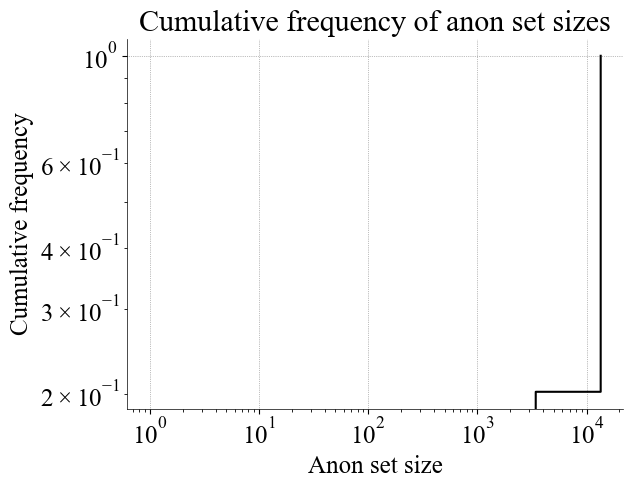

In [ ]:
reload(stats)
for attack in ["image-alt-attack", "default", "iframe-observer-attack", "lazy-image-loading-attack", "css-container-query-attack", "css-nth-child-attack"]:
    
    attack_dir = Path(f"../data/fingerprinting/adguard/{attack}/filterlist/targeted")
    
    if not (attack_dir / "fingerprints.csv").exists():
        continue
    
    print(attack)
    stats.targeted_anon_set_stats(attack_dir, 10, is_notebook=True)
    stats.targeted_time_stats(attack_dir)
    
    plt.show()
    
# TODO: update the stats to include total for lazy-image
# total time lazy 4 days
# TODO: update the unique field for both datasets

# Fingerprint Stability

### User Stability

In [ ]:
reload(stats)

valid_ublock_issues = CONF_DATASETS['ublock'][CONF_DATASETS['ublock'].valid]
user_changes, unchanged_users, user_change_stats = stats.get_users_changes_df_and_stats_df(valid_ublock_issues)

In [ ]:
dur_in_hrs = user_change_stats[user_change_stats.min_duration != np.infty].average_duration.describe()

pd.DataFrame({
    "hours": dur_in_hrs,
    "days": dur_in_hrs / 24,
    "months": dur_in_hrs / (24 * 30),
})

hours         days     months
count    565.000000    23.541667   0.784722
mean    4472.644485   186.360187   6.212006
std     5555.313675   231.471403   7.715713
min        0.122500     0.005104   0.000170
25%      948.807222    39.533634   1.317788
50%     2805.750833   116.906285   3.896876
75%     6466.464861   269.436036   8.981201
max    65782.740833  2740.947535  91.364918

### Commit Frequency

In [2]:
COMMITS_DATASETS = {
    'adguard':  pd.read_csv(DATA_DIR / "commits/adguard/parse/2024-04-27/changes.csv"),
    'ublock': pd.read_csv(DATA_DIR / "commits/ublock/parse/2024-04-29/changes.csv")
}

In [8]:
reload(stats)

def only_removed_generic(row: pd.Series):
    return row.change_type == "removed" and row.generic == True 

def only_removed_network_generic(row: pd.Series):
    return row.change_type == "removed" and row.generic == True and row.network == True

def only_generic(row: pd.Series):
    return row.generic == True or row.generic_new == True


stats.apply_to_datasets( lambda df: stats.intercommit_time_and_n_changes_stats(
    df,
    # only_generic
    lambda row: True
), COMMITS_DATASETS, is_notebook=True)

pass

count      mean       std  min       25%       50%       75%  \
adguard  10028.0  0.361029  1.328753  0.0  0.041111  0.102778  0.230278   
ublock    6782.0  0.525806  0.727606  0.0  0.072778  0.241111  0.670208   

               max  
adguard  27.512500  
ublock    7.763889